In [1]:
# This document demonstrates my ability to use different libraries, mainly matplotlib, for data visualization.

In [2]:
# Import libraries
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Ingest data from csv
df = pd.read_csv(
    "assets/Business_employment_data.csv", index_col=0
)  # Read csv into a dataframe
df.head()  # Display outputs

,series_reference,region_name,filled jobs,filled jobs revised,filled jobs diff,filled jobs % diff,total_earnings,total earnings revised,earnings diff,earnings % diff
period,,,,,,,,,,
2020.09,BDCQ.SED1RA,Northland,65520,65904,384,0.6,953,959,6,0.6
2020.09,BDCQ.SED1RB,Auckland,708372,714506,6134,0.9,12420,12530,110,0.9
2020.09,BDCQ.SED1RC,Waikato,198776,200265,1489,0.7,3041,3058,17,0.6
2020.09,BDCQ.SED1RD,Bay of Plenty,127323,128540,1217,1.0,1881,1899,18,1.0
2020.09,BDCQ.SED1RE,Gisborne,20417,20632,215,1.1,276,279,3,1.1


In [4]:
df.dropna(inplace=True) # Drop any rows with missing values

In [5]:
# Check the numeric columns
sum_performance = df[['filled jobs', 'filled jobs revised', 'filled jobs diff', 'filled jobs % diff', 'total_earnings', 'total earnings revised', 'earnings diff', 'earnings % diff']].sum()
print(sum_performance)
df.head

filled jobs               21566253.0
filled jobs revised       21772634.0
filled jobs diff            206381.0
filled jobs % diff             142.5
total_earnings              365288.0
total earnings revised      369022.0
earnings diff                 3734.0
earnings % diff                151.1
dtype: float64


<bound method NDFrame.head of         series_reference    region_name  filled jobs  filled jobs revised  \
period                                                                      
2020.09      BDCQ.SED1RA      Northland        65520                65904   
2020.09      BDCQ.SED1RB       Auckland       708372               714506   
2020.09      BDCQ.SED1RC        Waikato       198776               200265   
2020.09      BDCQ.SED1RD  Bay of Plenty       127323               128540   
2020.09      BDCQ.SED1RE       Gisborne        20417                20632   
...                  ...            ...          ...                  ...   
2022.12      BDCQ.SED1RL    Marlborough        25707                25909   
2022.12      BDCQ.SED1RM     West Coast        14315                14347   
2022.12      BDCQ.SED1RN     Canterbury       296998               299921   
2022.12      BDCQ.SED1RO          Otago       109243               110509   
2022.12      BDCQ.SED1RP      Southland       

In [6]:
## Convert the 'filled jobs' and 'total earnings' columns to numeric data type
df['filled_jobs'] = pd.to_numeric(df['filled jobs revised'], errors='coerce')
df['total_earnings'] = pd.to_numeric(df['total earnings revised'], errors='coerce')
df['filled_jobs'].head
df['total_earnings'].head

<bound method NDFrame.head of period
2020.09      959
2020.09    12530
2020.09     3058
2020.09     1899
2020.09      279
           ...  
2022.12      413
2022.12      227
2022.12     5161
2022.12     1803
2022.12      760
Name: total_earnings, Length: 160, dtype: int64>

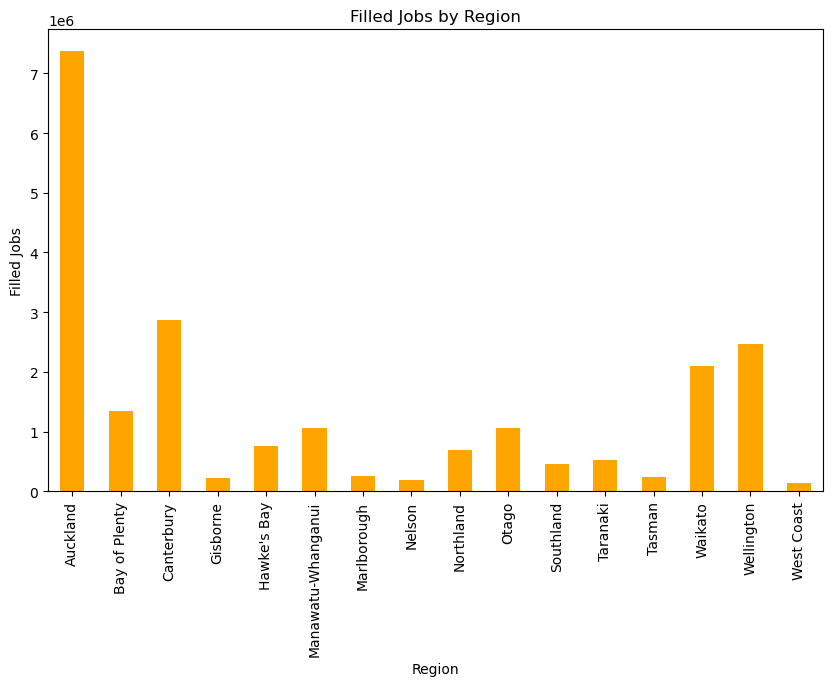

In [7]:
# Create a bar plot of filled jobs by region
plt.figure(figsize=(10, 6))
df.groupby('region_name')['filled_jobs'].sum().plot(kind='bar', color='orange')
plt.title('Filled Jobs by Region')
plt.xlabel('Region')
plt.ylabel('Filled Jobs')
plt.show()

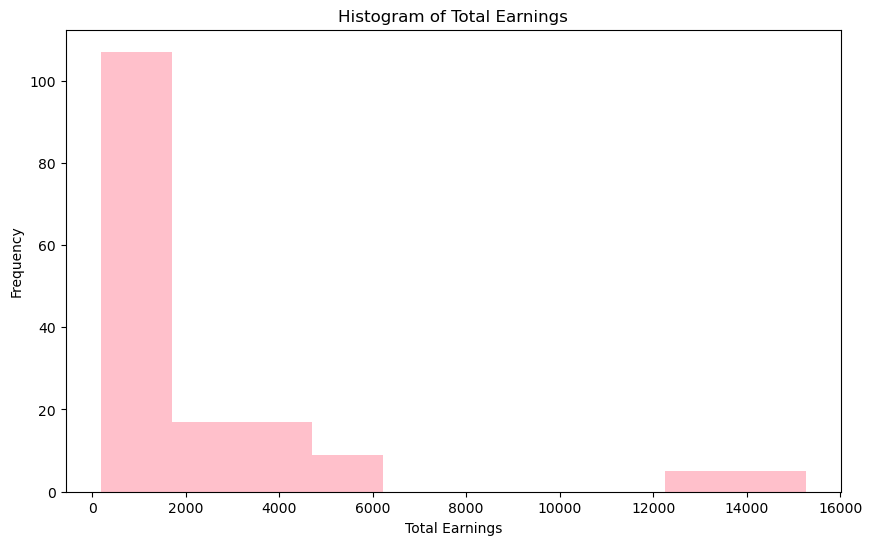

In [8]:
# Histogram of total earnings using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df['total_earnings'],color='pink', bins=10)
plt.title('Histogram of Total Earnings')
plt.xlabel('Total Earnings')
plt.ylabel('Frequency')
plt.show()

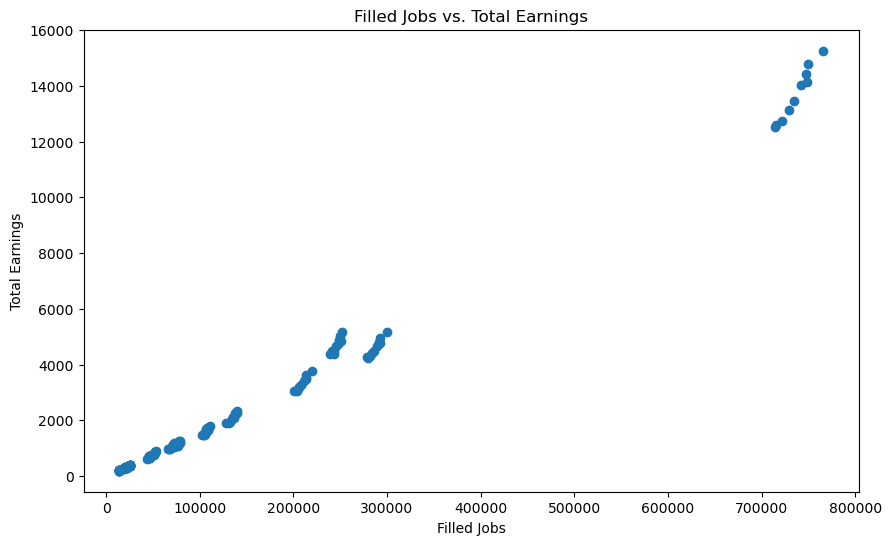

In [9]:
# A scatter plot of filled jobs vs. total earnings using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df['filled_jobs'], df['total_earnings'])
plt.title('Filled Jobs vs. Total Earnings')
plt.xlabel('Filled Jobs')
plt.ylabel('Total Earnings')
plt.show()

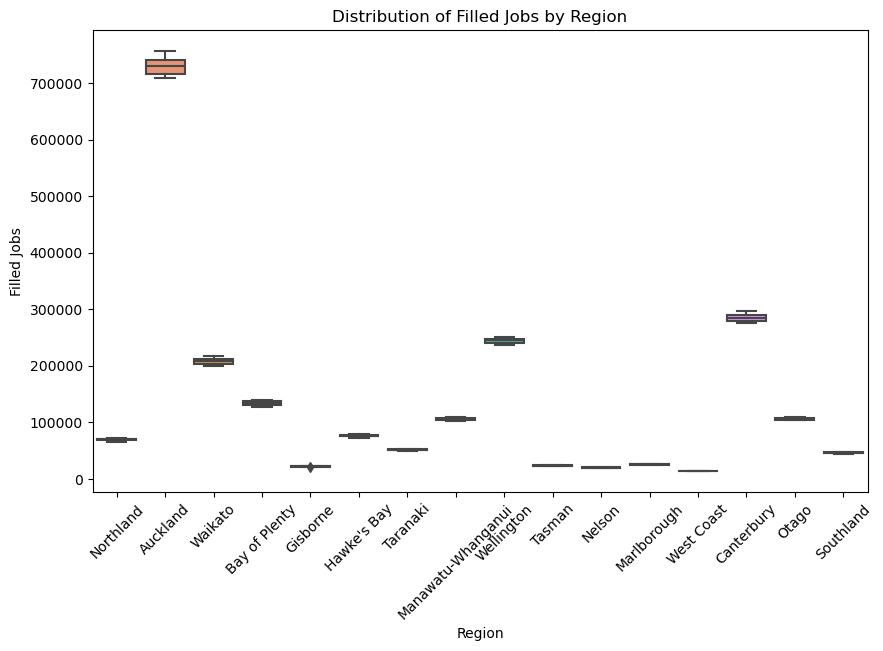

In [10]:
# Create a box plot of filled jobs by region using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region_name', y='filled jobs')
plt.title('Distribution of Filled Jobs by Region')
plt.xlabel('Region')
plt.ylabel('Filled Jobs')
plt.xticks(rotation=45)

plt.show()

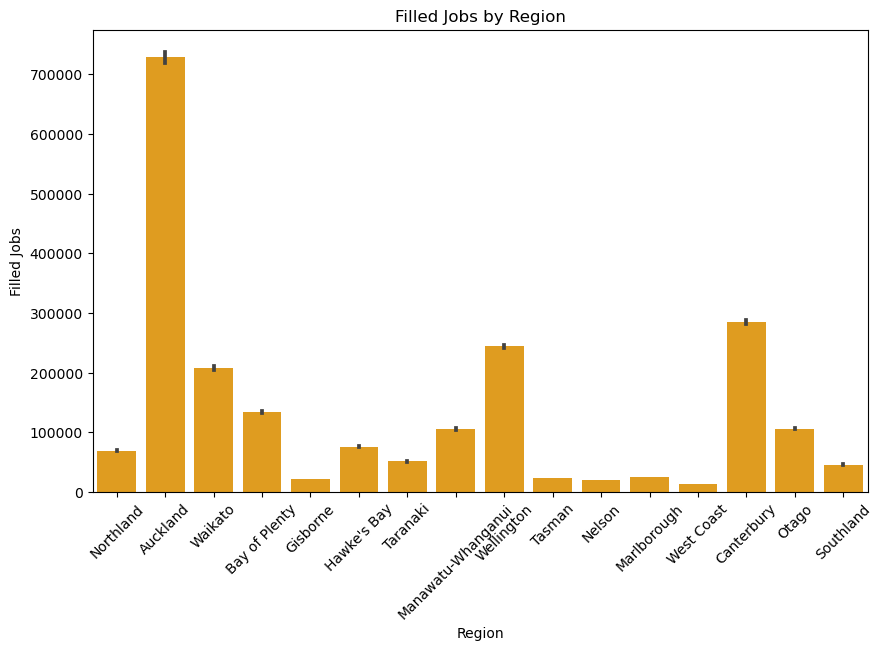

In [11]:
# Create a bar plot of filled jobs by region using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='region_name', y='filled jobs', color='orange')
plt.title('Filled Jobs by Region')
plt.xlabel('Region')
plt.ylabel('Filled Jobs')
plt.xticks(rotation=45)
plt.show()

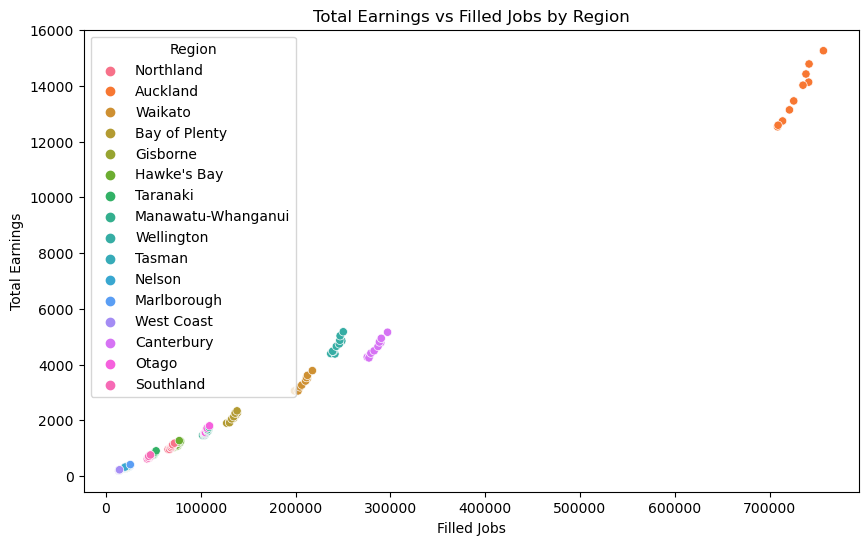

In [12]:
# Create a scatter plot of total earnings vs filled jobs by region using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='filled jobs', y='total_earnings', hue='region_name')
plt.title('Total Earnings vs Filled Jobs by Region')
plt.xlabel('Filled Jobs')
plt.ylabel('Total Earnings')
plt.legend(title='Region')

plt.show()

In [13]:
# Thank you for sparing your valuable time.
# Data download from https://www.stats.govt.nz/large-datasets/csv-files-for-download/ "Business employment data: March 2023 quarter – regional council revisions – CSV"